In [4]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from pylab import figure, xticks, yticks
import pylab
import socket
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from math import pi
from matplotlib.colors import LogNorm

#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

source = socket.gethostname()
if source=='fermi' or source=='Everest':
    data_root = os.path.join(os.environ['HOME'], 'Code', 'DMFT', 'SC_loop', 
                             'Data', 'bis_fresh_b60_inv')

my_colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'BlueViolet', 'Chartreuse', 'Coral', 'DarkGoldenRod',
           'DarkSalmon', 'GoldenRod']

my_ls = ['-', ':', '--', '-.']

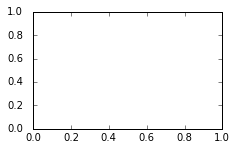

In [5]:
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 12
small_label_size = 16
#dashes
seq = [5, 2]

In [6]:
import sys
from numpy import array
import numpy as np
from math import pi
import math

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
#data_texture = np.genfromtxt(os.path.join(data_root, 'texture.dat'))
data_band = np.genfromtxt(os.path.join(data_root, 'aw.dmft'))
data_my = None
data_my_k = None
data_fermi = None
data_band = None
data_band_ref = None

In [10]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    
    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """
    
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in xrange(N+1) ]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

## Check DOS

In [11]:
#if data_band is None:
data_band = np.genfromtxt(os.path.join(data_root, 'aw.dmft'))

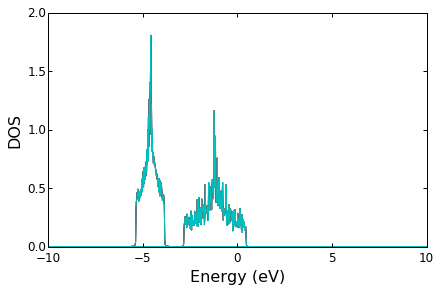

In [12]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
dpi_out = 400
data_len = data_band.shape[0] / 4

#color_map = cmap_discretize('bwr', 100)

#color_map = 'bwr'
color_map = 'afmhot_r'
#color_map = 'pink_r'
#color_map = 'gist_gray_r'
#color_map = 'binary_r'
# colormaps: http://matplotlib.org/examples/color/colormaps_reference.html
# or http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps


#imshow(T, aspect='auto', origin='lower', extent = ( x.min(), x.max(), y.min(), y.max()))


#####    Figure properties ###############################################

ax.tick_params(axis='y', which='major', pad=2)

xmin = np.amin(data_band[0:])
xmax = np.amax(data_band[0:])

#ax.set_xlim([-5, 5])
#ax.set_ylim([0.0, 2.0])

#x_tick_list = np.array([0.0, 0.5, 1.0, 1.0 + np.sqrt(2.0) / 2.0, xmax])
#ax.set_xticks(x_tick_list)
#ax.set_xticklabels([r'$(0, 0)$', r'$(\pi, 0)$', r'$(\pi, \pi)$', r'$(0, 0)$', r'$(\pi, -\pi)$'])

#y_tick_list = np.linspace(-2, 2, 3, endpoint=True)
#ax.set_yticks(y_tick_list)
#ax.set_yticklabels(['%1.0f'  % i for i in y_tick_list])

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)
    
for line in ax.get_xticklines() + ax.get_yticklines():
    line.set_color('k')
    line.set_markeredgewidth(1)

ax.set_xlabel(r'Energy (eV)', fontsize=small_label_size)
ax.set_ylabel(r'DOS', fontsize=small_label_size)

for i in range(data_band.shape[0] / data_len):
    ax.plot(data_band[i * data_len:(i+1) * data_len, 0], data_band[i * data_len:(i+1) * data_len, 1])
    
plt.savefig("dos.pdf")

In [13]:
#if data_band_ref is None:
data_band_ref = np.genfromtxt(os.path.join(data_root_ref, 'aw.dmft'))

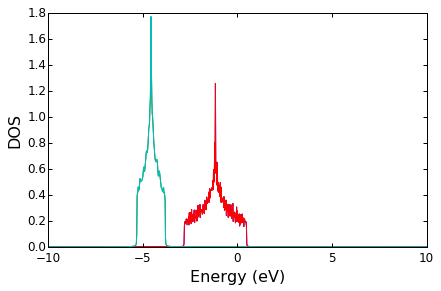

In [14]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
dpi_out = 400
data_len = data_band_ref.shape[0] / 4

#color_map = cmap_discretize('bwr', 100)

#color_map = 'bwr'
color_map = 'afmhot_r'
#color_map = 'pink_r'
#color_map = 'gist_gray_r'
#color_map = 'binary_r'
# colormaps: http://matplotlib.org/examples/color/colormaps_reference.html
# or http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps


#imshow(T, aspect='auto', origin='lower', extent = ( x.min(), x.max(), y.min(), y.max()))


#####    Figure properties ###############################################

ax.tick_params(axis='y', which='major', pad=2)

xmin = np.amin(data_band[0:])
xmax = np.amax(data_band[0:])

ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])

#x_tick_list = np.array([0.0, 0.5, 1.0, 1.0 + np.sqrt(2.0) / 2.0, xmax])
#ax.set_xticks(x_tick_list)
#ax.set_xticklabels([r'$(0, 0)$', r'$(\pi, 0)$', r'$(\pi, \pi)$', r'$(0, 0)$', r'$(\pi, -\pi)$'])

#y_tick_list = np.linspace(-2, 2, 3, endpoint=True)
#ax.set_yticks(y_tick_list)
#ax.set_yticklabels(['%1.0f'  % i for i in y_tick_list])

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)
    
for line in ax.get_xticklines() + ax.get_yticklines():
    line.set_color('k')
    line.set_markeredgewidth(1)

ax.set_xlabel(r'Energy (eV)', fontsize=small_label_size)
ax.set_ylabel(r'DOS', fontsize=small_label_size)

for i in range(data_band_ref.shape[0] / data_len):
    ax.plot(data_band_ref[i * data_len:(i+1) * data_len, 0], data_band_ref[i * data_len:(i+1) * data_len, 1])

## Check output of SC condition: $\Delta(\tau)$

In [15]:
nb_orbital_couples = 16

In [16]:
data_gtau_ref = np.genfromtxt(os.path.join(data_root_ref, 'delta.tau'))
data = data_gtau_ref

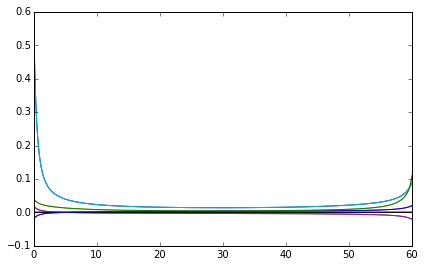

In [17]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
ax.tick_params(axis='y', which='major', pad=2)
data_len = len(data[:,0]) / nb_orbital_couples

for i in range(nb_orbital_couples):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

In [18]:
#if data_band_ref is None:
data_delta = np.genfromtxt(os.path.join(data_root, 'delta.tau'))
data = data_delta

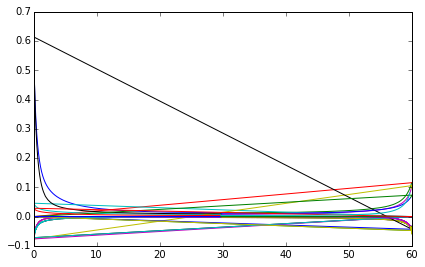

In [19]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
ax.tick_params(axis='y', which='major', pad=2)
data_len = len(data[:,0]) / nb_orbital_couples / 2

for i in range(nb_orbital_couples * 2):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

## Check output of QMC: $G(\tau)$

In [20]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [21]:
def get_gtau(in_path):
    data_length = file_len(in_path) / nb_orbital_couples
    data_gtau = np.zeros((nb_orbital_couples * data_length, 3))
    with open(in_path, 'r') as input_file:
        for block_index in np.arange(nb_orbital_couples):
            input_file.readline()
            for i in np.arange(data_length - 2):
                data_gtau[block_index * data_length + i, :] = map(float, input_file.readline().split())
            input_file.readline()
    #print "nb_orbitals: ", nb_orbitals
    #print "nb_k_points: ", nb_k_points
    return data_gtau

In [22]:
#if data_band_ref is None:
data_gtau = get_gtau(os.path.join(data_root_ref, 'gtau.out'))
data = data_gtau

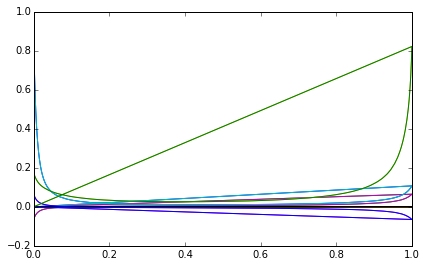

In [23]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
data_len = data.shape[0] / nb_orbital_couples

ax.tick_params(axis='y', which='major', pad=2)


for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

In [24]:
data_gtau = get_gtau(os.path.join(data_root, 'gtau.out_1'))
data = data_gtau

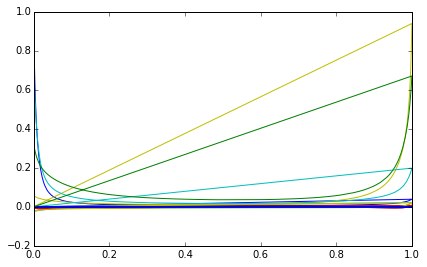

In [25]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
data_len = data.shape[0] / nb_orbital_couples

ax.tick_params(axis='y', which='major', pad=2)


for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

In [26]:
data_gtau = get_gtau(os.path.join(data_root, 'gtau.out_2'))
data = data_gtau

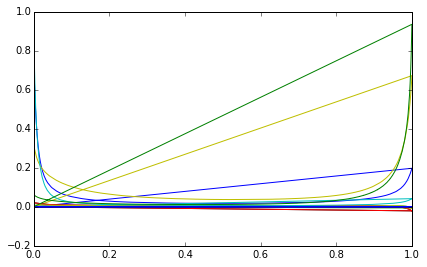

In [27]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
data_len = data.shape[0] / nb_orbital_couples

ax.tick_params(axis='y', which='major', pad=2)


for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

## Check output of QMC: $G(i\omega_n)$

In [28]:
#if data_band_ref is None:
data_gw = np.genfromtxt(os.path.join(data_root_ref, 'gw.out'))
data = data_gw

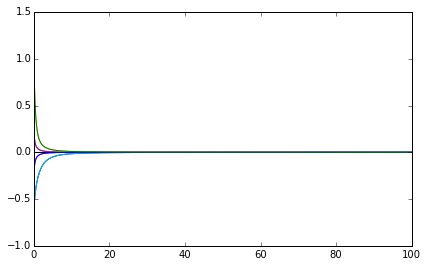

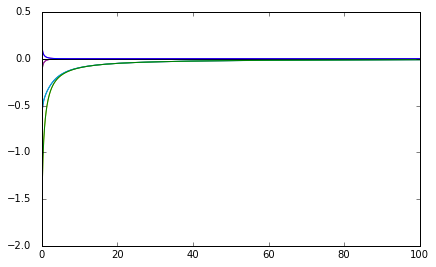

In [29]:
visu_factor = 2

data_len = data.shape[0] / nb_orbital_couples


fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

ax.tick_params(axis='y', which='major', pad=2)

for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])


fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2])

In [30]:
data_base = os.path.join(os.environ['HOME'], 'brno6', 'DMFT_data', '2site',
                             'teg0.4118_cross', 'ch0.05',  'dope1.4', 'b60_inv')

In [31]:
data_gw = np.genfromtxt(os.path.join(data_root, 'gw.out_1'))
data = data_gw

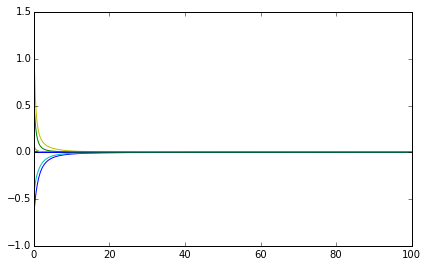

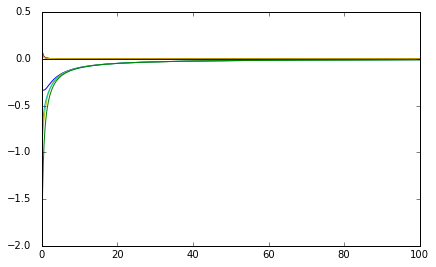

In [32]:
visu_factor = 2

data_len = data.shape[0] / nb_orbital_couples


fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

ax.tick_params(axis='y', which='major', pad=2)

for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])


fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2])

In [33]:
data_gw = np.genfromtxt(os.path.join(data_root, 'gw.out_2'))
data = data_gw

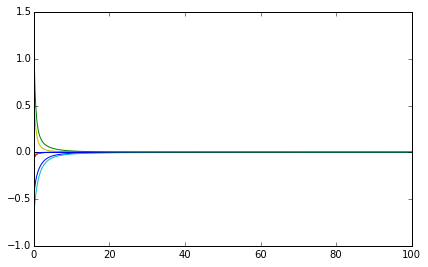

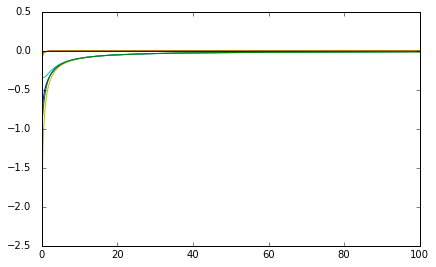

In [34]:
visu_factor = 2

data_len = data.shape[0] / nb_orbital_couples


fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

ax.tick_params(axis='y', which='major', pad=2)

for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])


fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(data.shape[0] / data_len):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2])

## Check output of QMC: $\Sigma(\omega)$

In [42]:
#if data_band_ref is None:
data_sigma_ref = np.genfromtxt(os.path.join(data_root_ref, 'sigma'))

data = data_sigma_ref

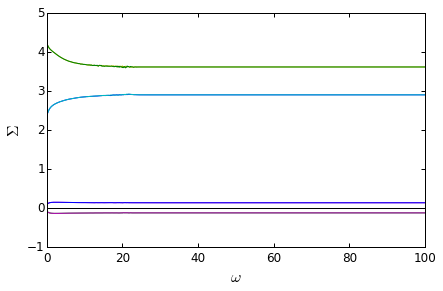

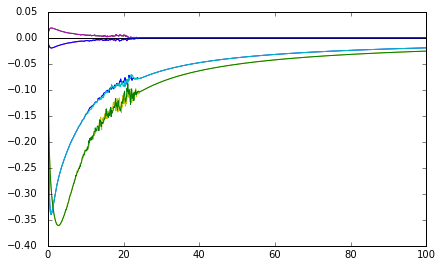

In [43]:
visu_factor = 2
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
dpi_out = 400
data_len = data.shape[0] / nb_orbital_couples

color_map = 'afmhot_r'

#####    Figure properties ###############################################

ax.tick_params(axis='y', which='major', pad=2)

xmin = np.amin(data_band[0:])
xmax = np.amax(data_band[0:])


for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)
    
for line in ax.get_xticklines() + ax.get_yticklines():
    line.set_color('k')
    line.set_markeredgewidth(1)

ax.set_xlabel(r'$\omega$', fontsize=small_label_size)
ax.set_ylabel(r'$\Sigma$', fontsize=small_label_size)

for i in range(nb_orbital_couples):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
#ax.set_ylim([-0.45, 0.02])
for i in range(nb_orbital_couples):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2])
    
plt.savefig("1site.pdf")

In [220]:
#data_sigma = np.genfromtxt(os.path.join(data_root, 'sigma'))
data_sigma = np.genfromtxt(os.path.join(data_root, 'sigma_large_c_min'))
#data_sigma = np.genfromtxt(os.path.join(data_root_bis, 'sigma'))
data = data_sigma
print data.shape
print data[:,0]

(30560, 3)
[  5.23598776e-02   1.57079633e-01   2.61799388e-01 ...,   9.97455668e+01
   9.98502865e+01   9.99550063e+01]


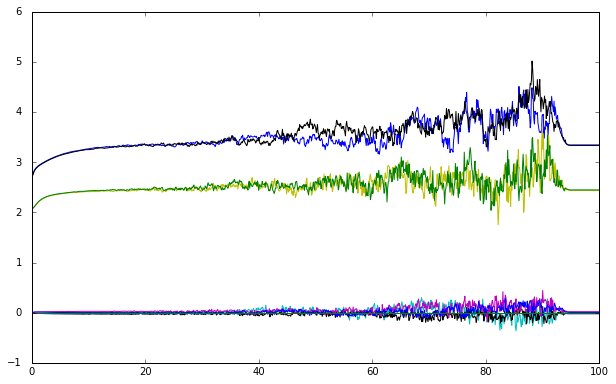

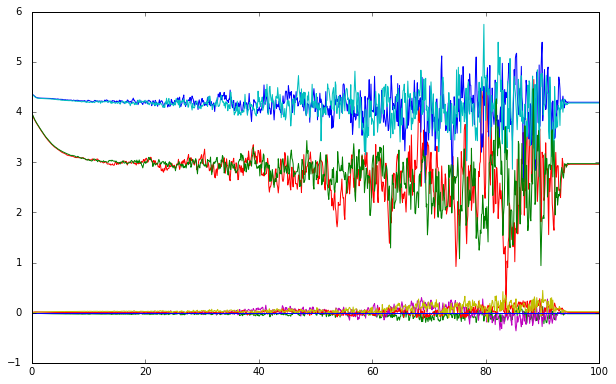

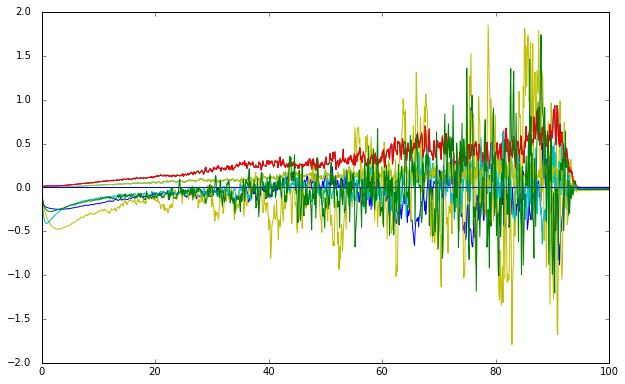

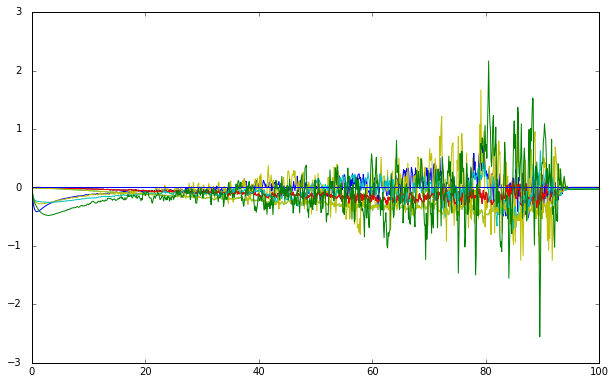

In [221]:
visu_factor = 3

dpi_out = 400
data_len = data.shape[0] / nb_orbital_couples / 2

#####    Figure properties ###############################################

ax.tick_params(axis='y', which='major', pad=2)

xmin = np.amin(data_band[0:])
xmax = np.amax(data_band[0:])

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)
    
for line in ax.get_xticklines() + ax.get_yticklines():
    line.set_color('k')
    line.set_markeredgewidth(1)

ax.set_xlabel(r'$\omega$', fontsize=small_label_size)
ax.set_ylabel(r'$\Sigma$', fontsize=small_label_size)

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(nb_orbital_couples * 2)[::2]:
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(nb_orbital_couples * 2)[1::2]:
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])
    
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
#ax.set_ylim([-0.55, 0.2])
for i in range(nb_orbital_couples):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
           label=str(i))
#ax.legend()
plt.savefig("2site.pdf")
    
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
#ax.set_ylim([-0.55, 0.2])
for i in range(nb_orbital_couples, nb_orbital_couples * 2):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
           label=str(i))
#ax.legend()


line 8595
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


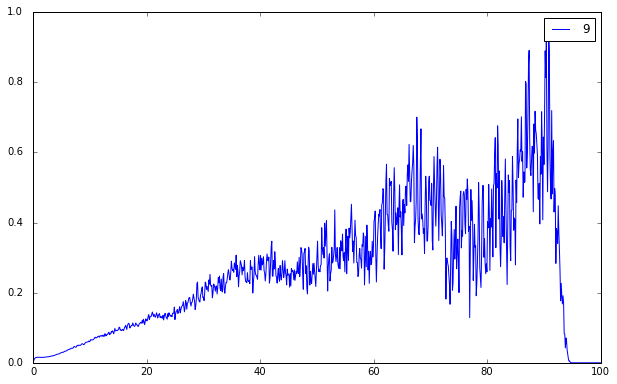

In [222]:
visu_factor = 3
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in [9]:#,12, 3,25,28]:
    print "line" , i * data_len
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
           label=str(i))
ax.legend()
print data[i * data_len:(i+1) * data_len, 2][-10:]

In [172]:
data_root_bis = os.path.join(os.environ['HOME'], 'brno6', 'DMFT_data', '2site',
                             'teg0.4118_cross', 'ch0.05',  'dope1.4', 'bis_fresh_b60_inv')
data_sigma = np.genfromtxt(os.path.join(data_root_bis, 'sigma'))
data = data_sigma
print data.shape
print data[:,0]
data_len = data.shape[0] / nb_orbital_couples / 2

(30560, 3)
[  5.23598776e-02   1.57079633e-01   2.61799388e-01 ...,   9.97455668e+01
   9.98502865e+01   9.99550063e+01]


max 1.11121268794e-08


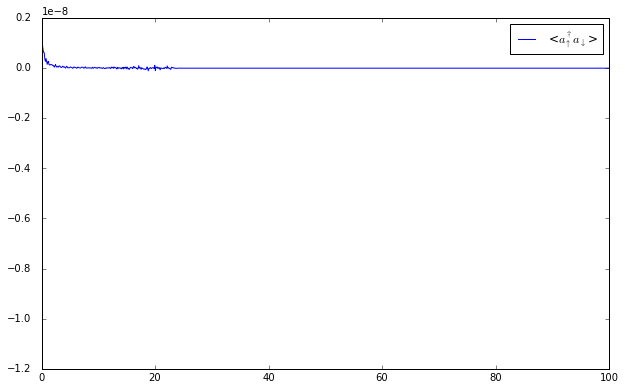

In [173]:
visu_factor = 3
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in range(9,10):
    print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 2]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
            label=r'<$a^\dagger_{\uparrow}a_{\downarrow}$>')
ax.legend()

In [174]:
data_root_sym = os.path.join(os.environ['HOME'], 'brno6', 'DMFT_data', '2site',
                             'teg0.4118_cross', 'ch0.05',  'dope1.4', 'sym_ch_investigate')
data_root_th = os.path.join(os.environ['HOME'], 'brno6', 'DMFT_data', '2site',
                             'teg0.4118_cross', 'ch0.05',  'dope1.4', 'th_ch_investigate')

In [178]:
data_delta = np.genfromtxt(os.path.join(data_root_sym, 'delta.tau'))
data = data_delta
data_len = data.shape[0] / nb_orbital_couples / 2

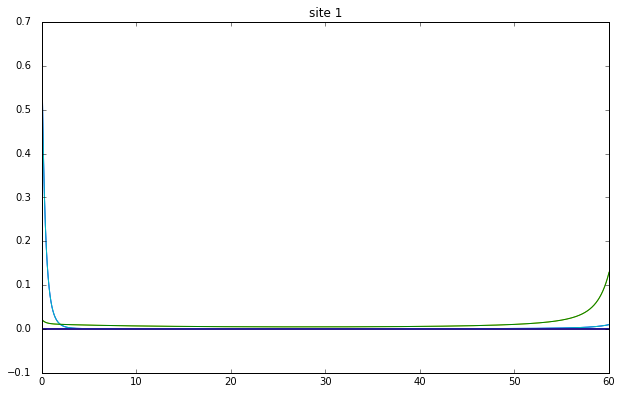

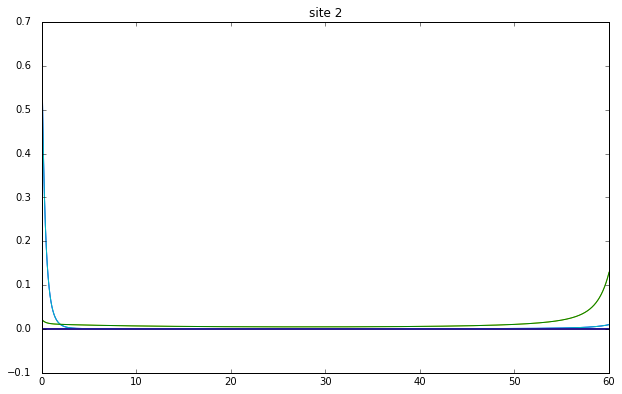

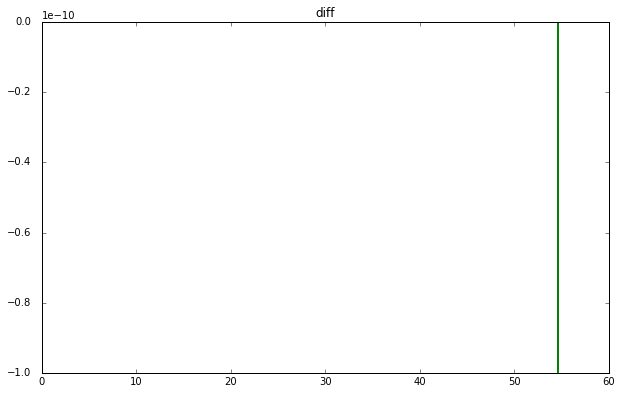

In [176]:
visu_factor = 3
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in range(nb_orbital_couples):
    #print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 1]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1],
            label=r'<$a^\dagger_{\uparrow}a_{\downarrow}$>')
plt.title('site 1') 
    
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in range(nb_orbital_couples, nb_orbital_couples * 2):
    #print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 1]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1],
            label=r'<$a^\dagger_{\uparrow}a_{\downarrow}$>')
plt.title('site 2') 

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in range(nb_orbital_couples):
    #print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 1]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0],
            data[i * data_len:(i+1) * data_len, 1] - data[(i + nb_orbital_couples) * data_len:
                                                          ((i + nb_orbital_couples)+1) * data_len, 1],
            label=r'<$a^\dagger_{\uparrow}a_{\downarrow}$>')
plt.title('diff')

In [179]:
data_delta = np.genfromtxt(os.path.join(data_root_th, 'delta.tau.double'))
data = data_delta
data_len = data.shape[0] / nb_orbital_couples / 2

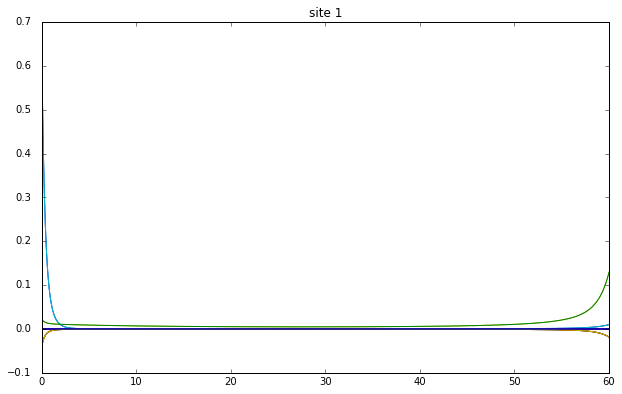

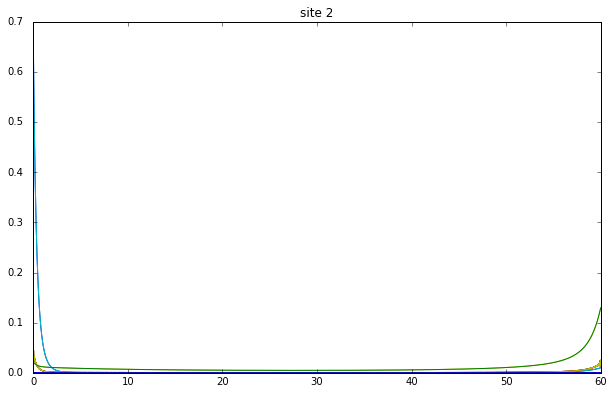

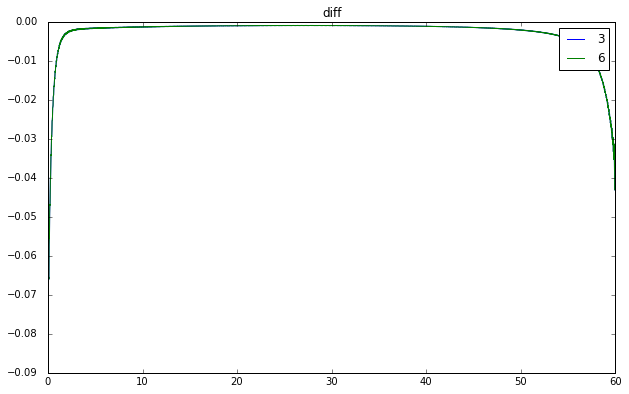

In [180]:
visu_factor = 3
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in range(nb_orbital_couples):
    #print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 1]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1],
            label=r'<$a^\dagger_{\uparrow}a_{\downarrow}$>')
plt.title('site 1') 

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in range(nb_orbital_couples, nb_orbital_couples * 2):
    #print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 1]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1],
            label=r'<$a^\dagger_{\uparrow}a_{\downarrow}$>')
plt.title('site 2')

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in [3,6]:
    #print "max", np.amax(np.abs(data[i * data_len:(i+1) * data_len, 1]))
    ax.plot(data[i * data_len:(i+1) * data_len, 0],
            data[i * data_len:(i+1) * data_len, 1] - data[(i + nb_orbital_couples) * data_len:
                                                          ((i + nb_orbital_couples)+1) * data_len, 1],
            label=str(i))
ax.legend()
plt.title('diff')

In [197]:
data_sigma = np.genfromtxt(os.path.join(data_root_th, 'sigma'))
data = data_sigma
print data.shape
print data[:,0]

(30560, 3)
[  5.23598776e-02   1.57079633e-01   2.61799388e-01 ...,   9.97455668e+01
   9.98502865e+01   9.99550063e+01]


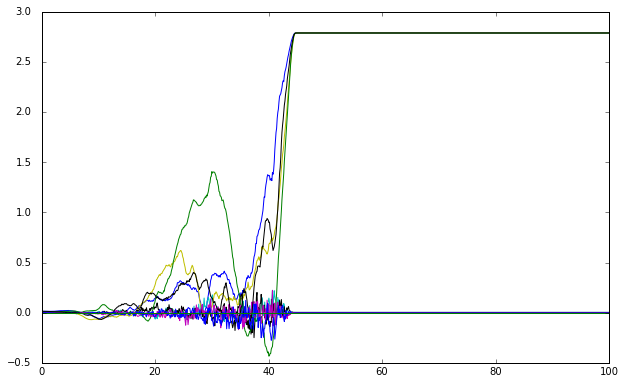

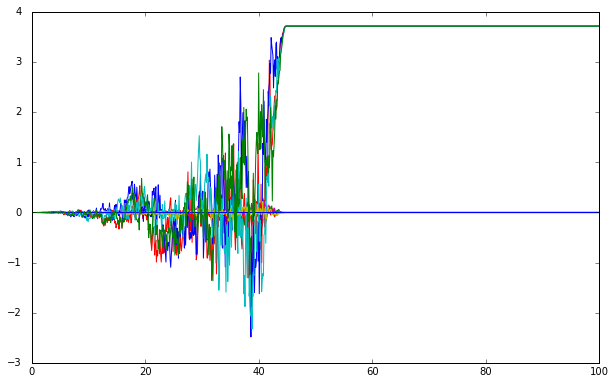

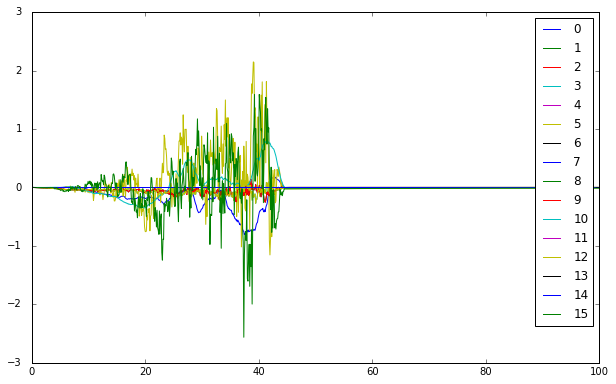

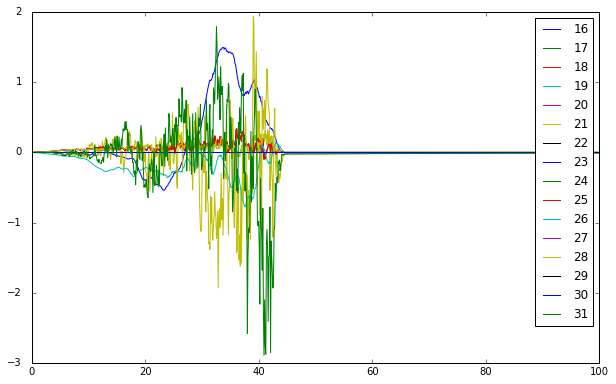

In [198]:
visu_factor = 3

dpi_out = 400
data_len = data.shape[0] / nb_orbital_couples / 2

#####    Figure properties ###############################################

ax.tick_params(axis='y', which='major', pad=2)

xmin = np.amin(data_band[0:])
xmax = np.amax(data_band[0:])

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(small_tick_size)
    
for line in ax.get_xticklines() + ax.get_yticklines():
    line.set_color('k')
    line.set_markeredgewidth(1)

ax.set_xlabel(r'$\omega$', fontsize=small_label_size)
ax.set_ylabel(r'$\Sigma$', fontsize=small_label_size)

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(nb_orbital_couples * 2)[::2]:
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])

fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)

for i in range(nb_orbital_couples * 2)[1::2]:
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 1])
    
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
#ax.set_ylim([-0.55, 0.2])
for i in range(nb_orbital_couples):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
           label=str(i))
ax.legend()
plt.savefig("2site.pdf")
    
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
#ax.set_ylim([-0.55, 0.2])
for i in range(nb_orbital_couples, nb_orbital_couples * 2):
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
           label=str(i))
ax.legend()


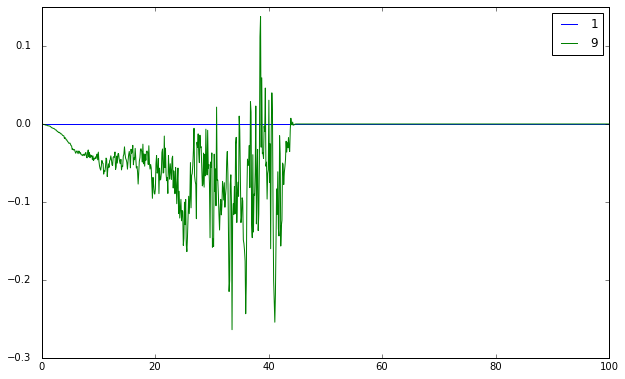

In [199]:
visu_factor = 3
fig, ax = plt.subplots(figsize = (fig_width * visu_factor,
                                  fig_height * visu_factor),
                       dpi=400,
                       frameon=False)
for i in [1,9]:#, 9, 12, 25,28]:
    ax.plot(data[i * data_len:(i+1) * data_len, 0], data[i * data_len:(i+1) * data_len, 2],
           label=str(i))
ax.legend()